# Exploratory Data Analysis

In [2]:
from scripts.mouse import Mouse

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Now we can group the data by mouse

cori = [Mouse(i) for i in range(1, 4)]
forssmann = [Mouse(i) for i in range(4, 8)]
hench = [Mouse(i) for i in range(8, 12)]
lederberg = [Mouse(i) for i in range(12, 19)]

## Exploring the Data

In [4]:
mice = [cori, forssmann, hench, lederberg]

### Successful trials

In [5]:
for mouse in mice:
    for session in mouse:
        print(
            session.mouse_name,
            session.date_exp,
            f"{sum(session.feedback_type == 1) /  len(session.feedback_type):.2%}"
        )

Cori 2016-12-14 60.53%
Cori 2016-12-17 63.35%
Cori 2016-12-18 66.23%
Forssmann 2017-11-01 66.67%
Forssmann 2017-11-02 66.14%
Forssmann 2017-11-04 74.14%
Forssmann 2017-11-05 67.06%
Hench 2017-06-15 64.40%
Hench 2017-06-16 68.55%
Hench 2017-06-17 61.97%
Hench 2017-06-18 79.53%
Lederberg 2017-12-05 73.82%
Lederberg 2017-12-06 79.67%
Lederberg 2017-12-07 69.40%
Lederberg 2017-12-08 76.49%
Lederberg 2017-12-09 71.79%
Lederberg 2017-12-10 83.04%
Lederberg 2017-12-11 80.56%


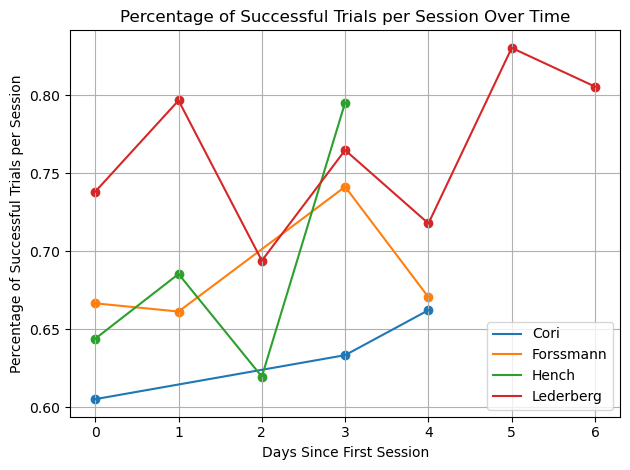

In [6]:
for mouse in mice:
    first_date = min(session.date_exp for session in mouse)
    days_since_first = [(session.date_exp - first_date).days for session in mouse]
    successes = [
        sum(session.feedback_type == 1) / len(session.feedback_type)
        for session in mouse
    ]
    mouse_name = mouse[0].mouse_name
    plt.plot(days_since_first, successes, label=mouse_name)
    plt.scatter(days_since_first, successes)

plt.xlabel("Days Since First Session")
plt.ylabel("Percentage of Successful Trials per Session")
plt.title("Percentage of Successful Trials per Session Over Time")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

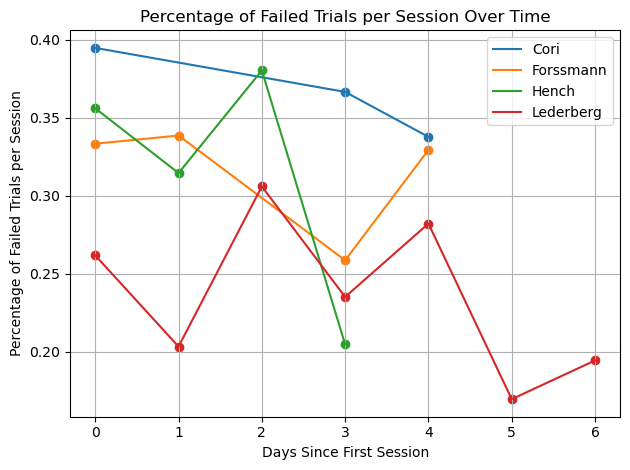

In [7]:
for mouse in mice:
    first_date = min(session.date_exp for session in mouse)
    days_since_first = [
        (session.date_exp - first_date).days for session in mouse
    ]
    failure = [
        sum(session.feedback_type == -1) / len(session.feedback_type)
        for session in mouse
    ]
    mouse_name = mouse[0].mouse_name
    plt.plot(days_since_first, failure, label=mouse_name)
    plt.scatter(days_since_first, failure)

plt.xlabel("Days Since First Session")
plt.ylabel("Percentage of Failed Trials per Session")
plt.title("Percentage of Failed Trials per Session Over Time")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

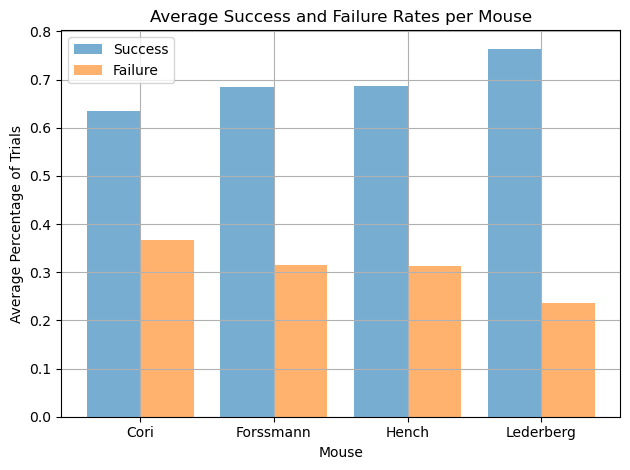

In [8]:
bar_width = 0.4
num_mice = len(mice)
x = np.arange(num_mice)

success_rates = []
failure_rates = []

for mouse in mice:
    success = np.mean(
        [sum(session.feedback_type == 1) / len(session.feedback_type) for session in mouse]
    )
    failure = np.mean(
        [sum(session.feedback_type == -1) / len(session.feedback_type) for session in mouse]
    )
    success_rates.append(success)
    failure_rates.append(failure)

plt.bar(x - bar_width/2, success_rates, width=bar_width, label='Success', alpha=0.6)
plt.bar(x + bar_width/2, failure_rates, width=bar_width, label='Failure', alpha=0.6)

plt.xlabel('Mouse')
plt.ylabel('Average Percentage of Trials')
plt.title('Average Success and Failure Rates per Mouse')
plt.xticks(x, [mouse[0].mouse_name for mouse in mice])
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig('./figures/success_failure_rates.png')
plt.show()

### Brain Activity

In [9]:
for mouse in mice:
    for session in mouse:
        print(
            session.mouse_name,
            session.date_exp,
            len(session.brain_areas),
            session.brain_areas
        )

Cori 2016-12-14 8 {'SUB', 'CA3', 'VISp', 'MOs', 'LS', 'ACA', 'DG', 'root'}
Cori 2016-12-17 5 {'VISpm', 'POST', 'VISl', 'CA1', 'root'}
Cori 2016-12-18 11 {'VISp', 'SPF', 'MG', 'DG', 'VISam', 'POST', 'LP', 'CA1', 'root', 'MRN', 'NB'}
Forssmann 2017-11-01 11 {'SUB', 'VISp', 'DG', 'VISa', 'TH', 'ACA', 'MOs', 'LGd', 'LSr', 'CA1', 'VPL'}
Forssmann 2017-11-02 10 {'SUB', 'DG', 'VISa', 'ACA', 'MOs', 'OLF', 'ORB', 'CA1', 'root', 'PL'}
Forssmann 2017-11-04 5 {'AUD', 'SSp', 'TH', 'CA1', 'root'}
Forssmann 2017-11-05 8 {'CA3', 'PIR', 'SSp', 'EPd', 'CP', 'root', 'VPL', 'LD'}
Hench 2017-06-15 15 {'SUB', 'CA3', 'VISp', 'MOs', 'ILA', 'TT', 'VISa', 'DG', 'LSr', 'root', 'CA1', 'LP', 'PO', 'LD', 'PL'}
Hench 2017-06-16 12 {'CA3', 'LD', 'TT', 'TH', 'VISam', 'VISl', 'LSr', 'ORBm', 'root', 'CA1', 'VPL', 'PL'}
Hench 2017-06-17 13 {'VISp', 'MRN', 'DG', 'POL', 'POST', 'SCsg', 'VISl', 'VISrl', 'CA1', 'root', 'MB', 'SCm', 'GPe'}
Hench 2017-06-18 6 {'MOp', 'CP', 'root', 'LSr', 'LSc', 'PT'}
Lederberg 2017-12-05 12 {'

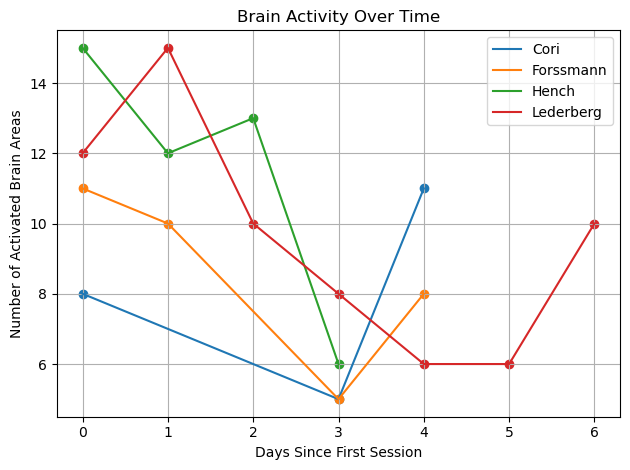

In [11]:
for mouse in mice:
    first_date = min(session.date_exp for session in mouse)
    days_since_first = [(session.date_exp - first_date).days for session in mouse]
    brain_areas = [len(session.brain_areas) for session in mouse]
    mouse_name = mouse[0].mouse_name
    plt.plot(days_since_first, brain_areas, label=mouse_name)
    plt.scatter(days_since_first, brain_areas)

plt.xlabel('Days Since First Session')
plt.ylabel('Number of Activated Brain Areas')
plt.title('Brain Activity Over Time')
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig('./figures/brain_activity.png')
plt.show()

**Neuron Spikes per Brain Area over all Trials**

In [12]:
session_neurons = {}
for session in cori:
    activated_neurons = {}
    for trial in session.list_of_trials:
        spikes = session.spikes.get(trial).astype(int)
        d = spikes.T.sum().to_dict()
        for k, v in d.items():
            if k in activated_neurons:
                activated_neurons[k] += v
            else:
                activated_neurons[k] = v
    
    session_neurons[session.date_exp] = activated_neurons

session_neurons

{datetime.date(2016, 12, 14): {'ACA': 67,
  'MOs': 31,
  'LS': 537,
  'root': 228,
  'VISp': 60,
  'CA3': 49,
  'SUB': 64,
  'DG': 0},
 datetime.date(2016, 12, 17): {'CA1': 20,
  'VISl': 55,
  'root': 36,
  'VISpm': 0,
  'POST': 994},
 datetime.date(2016, 12, 18): {'DG': 858,
  'VISam': 1,
  'MG': 1037,
  'CA1': 339,
  'SPF': 1048,
  'root': 0,
  'LP': 1854,
  'MRN': 867,
  'POST': 19,
  'NB': 54,
  'VISp': 0}}

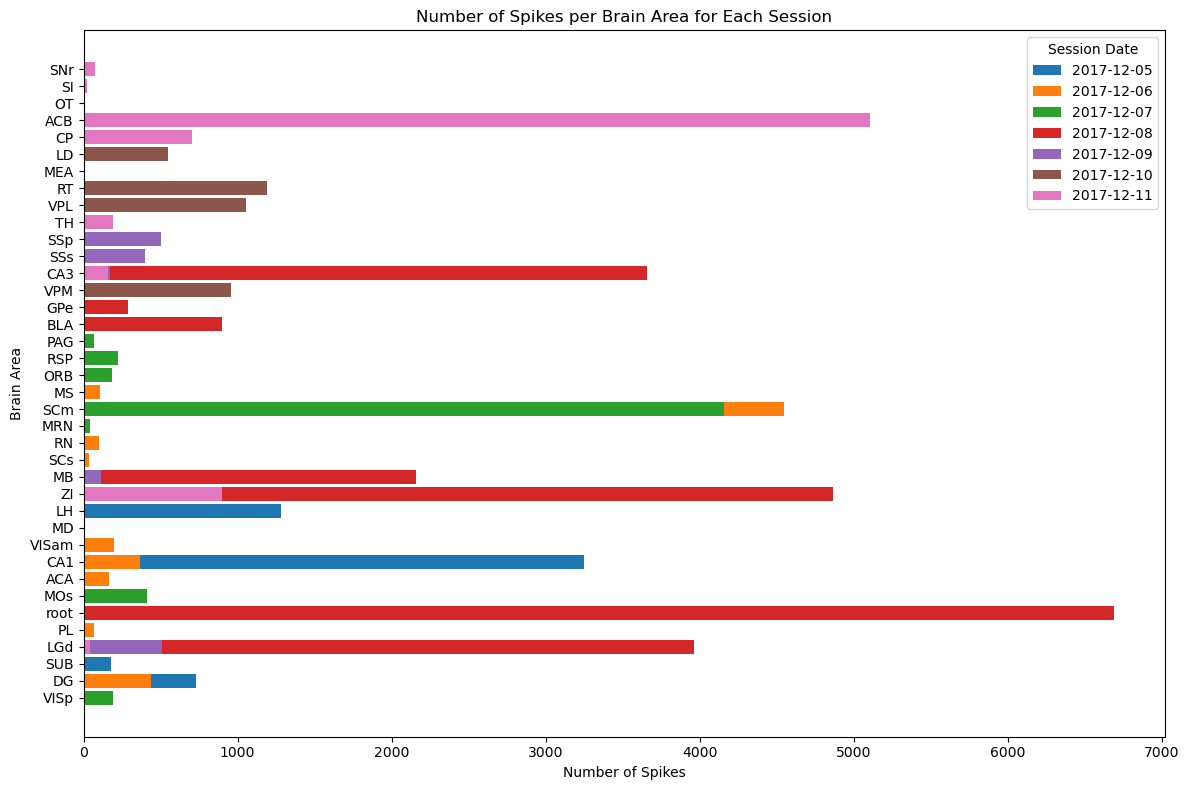

In [15]:
# Extract session dates and neuron data
session_dates = list(session_neurons.keys())
neuron_data = list(session_neurons.values())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot data for each session
for i, (date, neurons) in enumerate(zip(session_dates, neuron_data)):
    neuron_names = list(neurons.keys())
    spike_counts = list(neurons.values())
    ax.barh(neuron_names, spike_counts, label=str(date))

# Add labels and title
ax.set_xlabel('Number of Spikes')
ax.set_ylabel('Brain Area')
ax.set_title('Number of Spikes per Brain Area for Each Session')
ax.legend(title='Session Date')

# Show the plot
plt.tight_layout()
plt.show()

Examine this distribution over all mice.

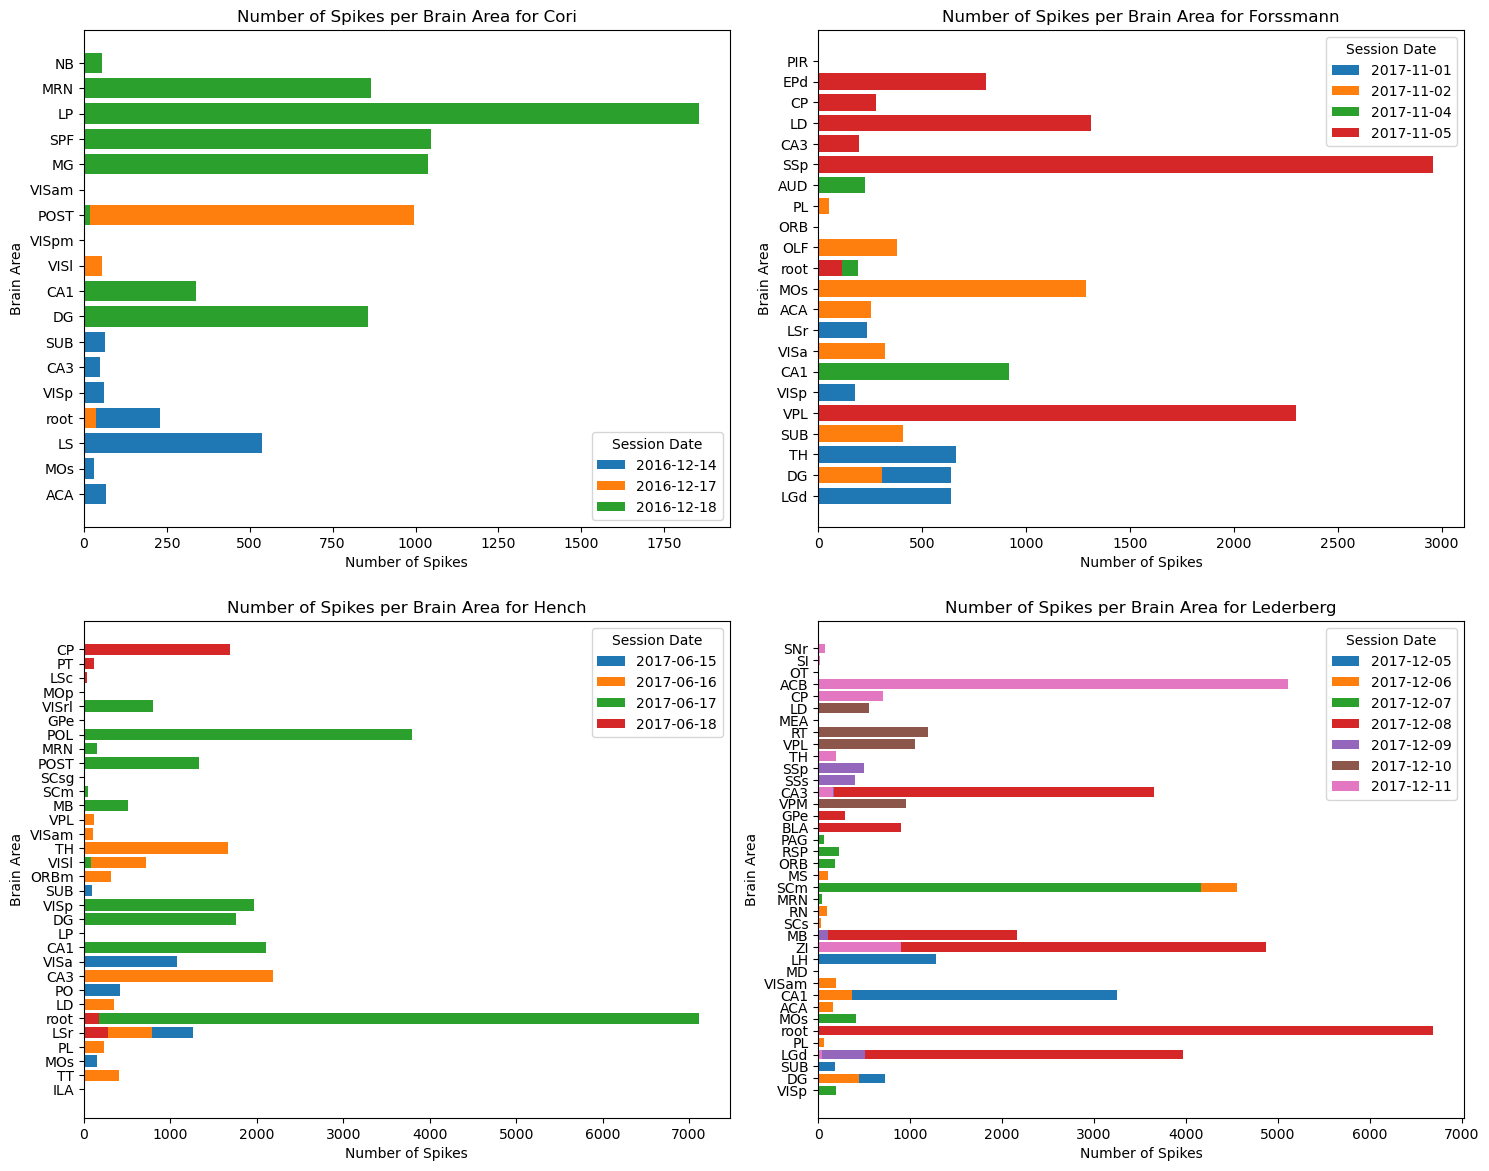

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

mice_names = ["cori", "forssmann", "hench", "lederberg"]
mice_list = [cori, forssmann, hench, lederberg]

for ax, mouse, name in zip(axs.flatten(), mice_list, mice_names):
    session_neurons = {}
    for session in mouse:
        activated_neurons = {}
        for trial in session.list_of_trials:
            spikes = session.spikes.get(trial).astype(int)
            spikes_per_neuron = spikes.T.sum().to_dict()
            for neuron, activation in spikes_per_neuron.items():
                if neuron in activated_neurons:
                    activated_neurons[neuron] += activation
                else:
                    activated_neurons[neuron] = activation

        session_neurons[session.date_exp] = activated_neurons

    session_dates = list(session_neurons.keys())
    neuron_data = list(session_neurons.values())

    for date, neurons in zip(session_dates, neuron_data):
        neuron_names = list(neurons.keys())
        spike_counts = list(neurons.values())
        ax.barh(neuron_names, spike_counts, label=str(date))

    ax.set_xlabel("Number of Spikes")
    ax.set_ylabel("Brain Area")
    ax.set_title(f"Number of Spikes per Brain Area for {name.capitalize()}")
    ax.legend(title="Session Date")

plt.tight_layout()
plt.gcf().set_size_inches(15, 12)
plt.savefig('./figures/spikes_per_brain_area.png')
plt.show()

### Other EDA

In [16]:
feedback_types = []
contrast_lefts = []
contrast_rights = []

# Collect data from each session in cori
for session in cori:
    feedback_types.extend(session.feedback_type)
    contrast_lefts.extend(session.contrast_left)
    contrast_rights.extend(session.contrast_right)

feedback_types = np.array(feedback_types)
contrast_lefts = np.array(contrast_lefts)
contrast_rights = np.array(contrast_rights)

In [17]:
# Compare neural activity between first and last session of each mouse

first = [mouse[0] for mouse in mice]
last = [mouse[-1] for mouse in mice]

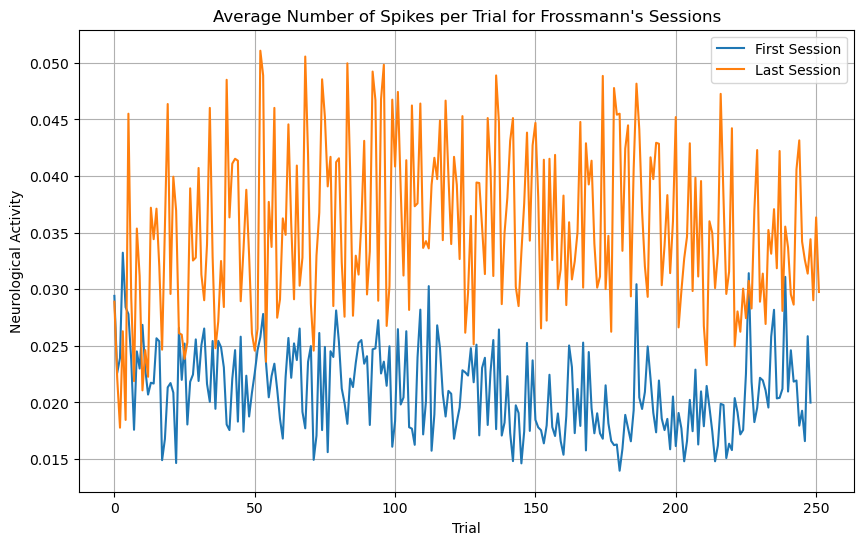

In [19]:
# Compare average number of spikes per trial for Forssmann's first and last session

frossmann = mice[1]

spikes_per_first_trial = []
spikes_per_last_trial = []

first_trial = frossmann[0]
for trial in first_trial.list_of_trials:
    spikes = first_trial.spikes.get(trial)
    spikes = spikes.astype(int)
    spikes_per_first_trial.append(spikes.mean().mean())

last_trial = frossmann[-1]
for trial in last_trial.list_of_trials:
    spikes = last_trial.spikes.get(trial)
    spikes = spikes.astype(int)
    spikes_per_last_trial.append(spikes.mean().mean())

plt.figure(figsize=(10, 6))
plt.plot(spikes_per_first_trial, label='First Session')
plt.plot(spikes_per_last_trial, label='Last Session')
plt.xlabel('Trial')
plt.ylabel('Neurological Activity')
plt.title("Average Number of Spikes per Trial for Frossmann's Sessions")
plt.legend()
plt.grid()
plt.savefig('./figures/frossmann_spikes_per_trial.png')
plt.show()